In [2]:
## standard for data preprocess, reading, visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## machine learning
import statsmodels.api as sm
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR

## evaluation
from sklearn.metrics import mean_squared_error

In [3]:
ls

 Volume in drive F has no label.
 Volume Serial Number is 103D-1420

 Directory of F:\Missions\Student Project

04/02/2023  12:57 PM    <DIR>          .
04/02/2023  12:57 PM    <DIR>          ..
04/01/2023  06:25 PM    <DIR>          .ipynb_checkpoints
04/01/2023  09:57 AM               666 Salary_dataset.csv
04/02/2023  12:57 PM            29,670 Student Project 1.ipynb
04/01/2023  06:25 PM            37,565 Student Project 1-Copy1.ipynb
04/01/2023  09:57 AM           109,349 StudentProject 1.pdf
               4 File(s)        177,250 bytes
               3 Dir(s)  405,464,805,376 bytes free


In [4]:
sd = pd.read_csv('Salary_dataset.csv')

In [5]:
sd.head()

,No,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
sd = sd.set_index('No')

In [7]:
sd.head()

,YearsExperience,Salary
No,,
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [8]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [9]:
sd.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [11]:
## melihat korelasi antara pengalaman (tahun) dengan salary yang didapat
## dari hasil yang didapat ternyata korelasinya positif dan sangat tinggi > 95%
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


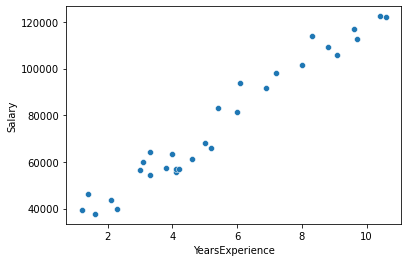

In [12]:
## melihat korelasi dengan scatter
sns.scatterplot(data = sd, x = 'YearsExperience', y = 'Salary')
plt.show()

In [13]:
## definisikan x sebagai shape 2 dimensi dan tidak skalar
x = sd[['YearsExperience']]
y = sd['Salary']

In [14]:
## Splitting train and test data for prediction results
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Ordinary Least Squared

In [15]:
ols = sm.OLS(X_train, y_train)
results = ols.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        YearsExperience   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              701.7
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                    1.83e-16
Time:                        13:50:09   Log-Likelihood:                         -27.082
No. Observations:                  20   AIC:                                      56.16
Df Residuals:                      19   BIC:                                      57.16
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
y_pred_ols = results.predict(X_test)

In [17]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  Salary    0.000074
dtype: float64
R2:  0.973636731188456


### Bayes Ridge Regression

In [18]:
bayes_model = BayesianRidge()

In [19]:
bayes_model.fit(X_train, y_train)

BayesianRidge()

In [20]:
y_pred_bayes = bayes_model.predict(X_test)

### Support Vector Machine Regressor

In [21]:
svm_model = SVR(kernel='rbf')

In [22]:
svm_model.fit(X_train, y_train)

SVR()

In [23]:
y_pred_svm = svm_model.predict(X_test)

###  RMSE for each model

In [24]:
ols = mean_squared_error(y_test, y_pred_ols, squared=False)
svm = mean_squared_error(y_test, y_pred_svm, squared=False)
bayes = mean_squared_error(y_test, y_pred_bayes, squared=False)

In [25]:
print('Ordinary Least Square RMSE :', ols)
print('Bayes Ridge RMSE :', bayes)
print('SVM Regressor RMSE :', svm)

Ordinary Least Square RMSE : 87367.65285718253
Bayes Ridge RMSE : 5946.238317580407
SVM Regressor RMSE : 34815.9241793525


Smallest RMSE is on Bayes Ridge with RMSE 5946.24